# スクレイピングでニュース記事を色々いじってみた

In [1]:
#まずはライブラリをインポート
!pip install newspaper3k
import newspaper
from newspaper import Article

### 読売のニュースサイトから記事を取得して、keywordsや要約を抽出してみよう！

In [2]:
#読売のニュースサイトからニュース記事を取得してみよう
url = "https://www.yomiuri.co.jp/world/20201210-OYT1T50009/"
a = Article(url)
a.download()
a.parse()

In [3]:
a.title

'英ワクチン接種で２人にアレルギー反応…過去に経験ある人には回避呼びかけ : 国際 : ニュース'

In [4]:
a.text

'【ロンドン＝広瀬誠】英ＢＢＣなどは９日、英国で始まった新型コロナウイルスのワクチン接種で、英当局が、過去にワクチンや食品、薬で深刻なアレルギー反応を示したことのある人は接種を避けるよう呼びかけたと伝えた。\n\n欧米で初となる国民への大規模なワクチン接種は、高齢者や医療従事者らを対象に８日から始まった。接種した医療関係者２人がアレルギー反応を示したが、既に回復したという。２人とも過去に深刻なアレルギー反応の経験があり、アレルギーのショック症状を和らげる注射薬を携帯していた。\n\n接種が始まったワクチンは、米製薬大手ファイザーと独製薬企業ビオンテックが共同開発したもので、日本政府は、日本国内でも来年に供給を受けることで合意している。'

In [5]:
a.publish_date

datetime.datetime(2020, 12, 10, 0, 0)

In [6]:
a.authors

[]

In [7]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/jupyterlab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
a.nlp()

In [9]:
a.keywords

['ニュース',
 'ロンドン広瀬誠英ｂｂｃなどは９日英国で始まった新型コロナウイルスのワクチン接種で英当局が過去にワクチンや食品薬で深刻なアレルギー反応を示したことのある人は接種を避けるよう呼びかけたと伝えた欧米で初となる国民への大規模なワクチン接種は高齢者や医療従事者らを対象に８日から始まった接種した医療関係者２人がアレルギー反応を示したが既に回復したという２人とも過去に深刻なアレルギー反応の経験がありアレルギーのショック症状を和らげる注射薬を携帯していた接種が始まったワクチンは米製薬大手ファイザーと独製薬企業ビオンテックが共同開発したもので日本政府は日本国内でも来年に供給を受けることで合意している',
 '国際',
 '英ワクチン接種で２人にアレルギー反応過去に経験ある人には回避呼びかけ']

In [10]:
a.summary

'【ロンドン＝広瀬誠】英ＢＢＣなどは９日、英国で始まった新型コロナウイルスのワクチン接種で、英当局が、過去にワクチンや食品、薬で深刻なアレルギー反応を示したことのある人は接種を避けるよう呼びかけたと伝えた。欧米で初となる国民への大規模なワクチン接種は、高齢者や医療従事者らを対象に８日から始まった。接種した医療関係者２人がアレルギー反応を示したが、既に回復したという。２人とも過去に深刻なアレルギー反応の経験があり、アレルギーのショック症状を和らげる注射薬を携帯していた。接種が始まったワクチンは、米製薬大手ファイザーと独製薬企業ビオンテックが共同開発したもので、日本政府は、日本国内でも来年に供給を受けることで合意している。'

### ...要約じゃなくて、文章そのまま出とるやないか！日本語記事での動作はいまいちなのか…？<br>
#### じゃあ、Bloombergの英語記事でやってみよう。

In [11]:
url_e = "https://www.bloomberg.com/news/articles/2020-12-09/u-k-says-those-with-severe-allergy-shouldn-t-get-pfizer-vaccine"
a_e = Article(url_e)
a_e.download()
a_e.parse()

In [12]:
a_e.nlp()

In [13]:
a_e.keywords

['supports',
 'robot',
 'loading',
 'information',
 'sure',
 'policy',
 'happenplease',
 'javascript',
 'service',
 'terms',
 'review']

In [14]:
a_e.summary

'Why did this happen?\nPlease make sure your browser supports JavaScript and cookies and that you are not blocking them from loading.\nFor more information you can review our Terms of Service and Cookie Policy.'

In [15]:
a_e.summary.replace("\n","")

'Why did this happen?Please make sure your browser supports JavaScript and cookies and that you are not blocking them from loading.For more information you can review our Terms of Service and Cookie Policy.'

In [16]:
a_e.title

'Are you a robot?'

### はいきたJavascriptですね。Bloombergは諦めて、Reutersでやってみましょう。

In [17]:
url_r = "https://www.reuters.com/article/idUSKBN28J1D1"
a_r = Article(url_r)
a_r.download()
a_r.parse()
a_r.nlp()

In [18]:
a_r.keywords

['allergic',
 'reactions',
 'pfizer',
 'issues',
 'medicine',
 'covid19',
 'uk',
 'history',
 'warning',
 'anaphylaxis',
 'vaccine',
 'adverse',
 'food',
 'mhra']

In [19]:
a_r.summary

'LONDON (Reuters) - Britain’s medicine regulator said anyone with a history of anaphylaxis to a medicine or food should not get the Pfizer-BioNTech COVID-19 vaccine, giving fuller guidance on an earlier allergy warning about the shot.\nFILE PHOTO: A woman holds a small bottle labeled with a "Coronavirus COVID-19 Vaccine" sticker and a medical syringe in front of displayed Pfizer logo in this illustration taken, October 30, 2020.\n“Any person with a history of anaphylaxis to a vaccine, medicine or food should not receive the Pfizer BioNTech vaccine,” MHRA Chief Executive June Raine said in a statement.\nA top U.S. official said on Wednesday that Americans with known severe allergic reactions may not be candidates for Pfizer’s COVID-19 vaccine until more was understood about what had happened.\nALLERGIC REACTIONMHRA chief Raine told lawmakers such allergic reactions had not been a feature of the Pfizer’s clinical trials.'

In [20]:
a_r.summary.replace("\n","")

'LONDON (Reuters) - Britain’s medicine regulator said anyone with a history of anaphylaxis to a medicine or food should not get the Pfizer-BioNTech COVID-19 vaccine, giving fuller guidance on an earlier allergy warning about the shot.FILE PHOTO: A woman holds a small bottle labeled with a "Coronavirus COVID-19 Vaccine" sticker and a medical syringe in front of displayed Pfizer logo in this illustration taken, October 30, 2020.“Any person with a history of anaphylaxis to a vaccine, medicine or food should not receive the Pfizer BioNTech vaccine,” MHRA Chief Executive June Raine said in a statement.A top U.S. official said on Wednesday that Americans with known severe allergic reactions may not be candidates for Pfizer’s COVID-19 vaccine until more was understood about what had happened.ALLERGIC REACTIONMHRA chief Raine told lawmakers such allergic reactions had not been a feature of the Pfizer’s clinical trials.'

In [21]:
a_r.text

'LONDON (Reuters) - Britain’s medicine regulator said anyone with a history of anaphylaxis to a medicine or food should not get the Pfizer-BioNTech COVID-19 vaccine, giving fuller guidance on an earlier allergy warning about the shot.\n\nFILE PHOTO: A woman holds a small bottle labeled with a "Coronavirus COVID-19 Vaccine" sticker and a medical syringe in front of displayed Pfizer logo in this illustration taken, October 30, 2020. REUTERS/Dado Ruvic/File Photo\n\nStarting with the elderly and frontline workers, Britain began mass vaccinating its population on Tuesday, part of a global drive that poses one of the biggest logistical challenges in peacetime history.\n\nThe Medicines and Healthcare Products Regulatory Agency (MHRA) said there had been two reports of anaphylaxis and one report of a possible allergic reaction since rollout began.\n\n“Any person with a history of anaphylaxis to a vaccine, medicine or food should not receive the Pfizer BioNTech vaccine,” MHRA Chief Executive J

### ロイターはいけた！サマリーも内容的にちゃんとサマリーになっていそう！すごい！

複数記事の方は、Bloombergいけたんだが、英語版だけJava問題引っかかるのか…？<br>
このニュースのキーワード＆要約とFor構文スキームは面白いもの作れそう。<br>
とりあえずキーワードクイズ作ってみようかな。

### 日本語サイトも、違うサイトだったら出来たりしないかしら…？　名探偵コナンで実験してみよう！

In [22]:
url_c = "https://www.czujniki.net/konan1066/"
a_c = Article(url_c,language='ja')
a_c.download()
a_c.parse()
a_c.nlp()

In [23]:
a_c.keywords

['名探偵コナン1066話最新話ネタバレ確定感想rumの正体fbi連続殺害事件解決',
 'こんにちはひらりです2020年12月9日発売の週刊少年サンデーより名探偵コナン1066話rumを読みました1065話では存在がばれてしまったキャメルは森を焼かれて隠れることさえ出来なくなってしまいました黒ずくめの組織に見つかったキャメルの顔を潰そうとする水無ですがジンは顔を潰すなと指示キャメルは胸を撃ち抜かれてしまいましたそれではこの記事では名探偵コナン1066話のネタバレと感想次話考察予想についてまとめました名探偵コナン1066話最新話ネタバレあらすじキャンティの放った銃弾がキャメルの右胸を貫きキャメルは海に落下しました焦るコナンに赤井は狙い通りいったとグーサインをします今から海に潜りキャメルの死体を回収すると言うジンは先に手に持った手榴弾を使い生きているかもしれないキャメルの命を完全に絶つつもりでいます未だスコープを覗く赤井は手榴弾がジンの手を離れたと同時に手榴弾を弾きました遠距離からの狙撃に気づいた黒ずくめの組織は急いで死体だけでも回収しようとするも消防艇が到着してしまったため慌てて逃げ出しましたしかしキャメルのカオはベルモットにバレていました名前と写真を示したベルモットからスマホを奪うジンはすぐにコルンにキャメルのことを聞きますコルンは確かにキャメルの顔に見覚えがありました2年前赤井とキャメルを殺せとrumから指示を受けた際に写真を送られていたのですその話を懐かしむrumは少しやり過ぎだがキャメルを殺せたことは評価するというボスの伝言を伝えますrumとしては生け捕りにして話を聞きたかったようです無事に帰還したキャメルは髪の毛を短く刈り上げられた後どうして無事なのかを話しました赤井の指示でカフェ内の道具を使い防弾チョッキを作っていたキャメルは実際怪我をしておらず出血は持っていた血糊によるものです後ろからはキャンティ前からは赤井に血糊の袋を破かれましたキャメルが無事だったものの多くの犠牲を出してしまった今回の事件しかし何とかrumの情報を少しだけ掴むことが出来ました顔を変えてふざけた名前を名乗る人物彼がキャメルと話したかったのは以前倉庫にて自分を心配してくれた男がキャメルだったからです不敵に笑うrumは目的地に到着するとかつらつけ髭出っ歯眼帯をつけて車から降りていきました

In [24]:
a_c.summary

'こんにちは。ひらりです。2020年12月9日発売の週刊少年サンデーより、名探偵コナン【1066話】「RUM」を読みました。1065話では、存在がばれてしまったキャメルは、森を焼かれて隠れることさえ出来なくなってしまいました。黒ずくめの組織に見つかったキャメルの顔を潰そうとする水無ですが、ジンは顔を潰すなと指示。キャメルは胸を撃ち抜かれてしまいました。それでは、この記事では、名探偵コナン【1066話】のネタバレと感想＆次話考察予想についてまとめました。名探偵コナン【1066話】最新話ネタバレあらすじキャンティの放った銃弾がキャメルの右胸を貫き、キャメルは海に落下しました。焦るコナンに、赤井は狙い通りいったとグーサインをします。今から海に潜りキャメルの死体を回収すると言うジンは先に手に持った手榴弾を使い、生きているかもしれないキャメルの命を完全に絶つつもりでいます。未だスコープを覗く赤井は、手榴弾がジンの手を離れたと同時に手榴弾を弾きました。遠距離からの狙撃に気づいた黒ずくめの組織は、急いで死体だけでも回収しようとするも消防艇が到着してしまったため慌てて逃げ出しました。しかし、キャメルのカオはベルモットにバレていました。名前と写真を示したベルモットからスマホを奪うジンは、すぐにコルンにキャメルのことを聞きます。コルンは確かにキャメルの顔に見覚えがありました。2年前、赤井とキャメルを殺せとRUMから指示を受けた際に写真を送られていたのです。その話を懐かしむRUMは、少しやり過ぎだがキャメルを殺せたことは評価するというボスの伝言を伝えます。RUMとしては生け捕りにして、話を聞きたかったようです。無事に帰還したキャメルは髪の毛を短く刈り上げられた後、どうして無事なのかを話しました。赤井の指示でカフェ内の道具を使い防弾チョッキを作っていたキャメルは実際怪我をしておらず、出血は持っていた血糊によるものです。後ろからはキャンティ、前からは赤井に血糊の袋を破かれました。キャメルが無事だったものの多くの犠牲を出してしまった今回の事件。しかし何とかRUMの情報を少しだけ掴むことが出来ました。顔を変えてふざけた名前を名乗る人物。彼がキャメルと話したかったのは、以前倉庫にて自分を心配してくれた男がキャメルだったからです。不敵に笑うRUMは目的地に到着すると、かつら、つけ髭、出っ歯、眼帯をつ

In [25]:
a_c.text

'こんにちは。ひらりです。2020年12月9日発売の週刊少年サンデーより、名探偵コナン【1066話】「RUM」を読みました。\n\n1065話では、存在がばれてしまったキャメルは、森を焼かれて隠れることさえ出来なくなってしまいました。\n\n黒ずくめの組織に見つかったキャメルの顔を潰そうとする水無ですが、ジンは顔を潰すなと指示。キャメルは胸を撃ち抜かれてしまいました。\n\nそれでは、この記事では、名探偵コナン【1066話】のネタバレと感想＆次話考察予想についてまとめました。\n\n名探偵コナン【1066話】最新話ネタバレあらすじ\n\nキャンティの放った銃弾がキャメルの右胸を貫き、キャメルは海に落下しました。焦るコナンに、赤井は狙い通りいったとグーサインをします。\n\n今から海に潜りキャメルの死体を回収すると言うジンは先に手に持った手榴弾を使い、生きているかもしれないキャメルの命を完全に絶つつもりでいます。\n\n未だスコープを覗く赤井は、手榴弾がジンの手を離れたと同時に手榴弾を弾きました。\n\n遠距離からの狙撃に気づいた黒ずくめの組織は、急いで死体だけでも回収しようとするも消防艇が到着してしまったため慌てて逃げ出しました。\n\nしかし、キャメルのカオはベルモットにバレていました。\n\n名前と写真を示したベルモットからスマホを奪うジンは、すぐにコルンにキャメルのことを聞きます。\n\nコルンは確かにキャメルの顔に見覚えがありました。\n\n2年前、赤井とキャメルを殺せとRUMから指示を受けた際に写真を送られていたのです。\n\nその話を懐かしむRUMは、少しやり過ぎだがキャメルを殺せたことは評価するというボスの伝言を伝えます。\n\nRUMとしては生け捕りにして、話を聞きたかったようです。\n\n無事に帰還したキャメルは髪の毛を短く刈り上げられた後、どうして無事なのかを話しました。\n\n赤井の指示でカフェ内の道具を使い防弾チョッキを作っていたキャメルは実際怪我をしておらず、出血は持っていた血糊によるものです。\n\n後ろからはキャンティ、前からは赤井に血糊の袋を破かれました。\n\nキャメルが無事だったものの多くの犠牲を出してしまった今回の事件。しかし何とかRUMの情報を少しだけ掴むことが出来ました。\n\n顔を変えてふざけた名前を名乗る人物。彼がキャメ

### やっぱり出来ない！！！ 日本語サイトのKeywordsや要約の取得はちょっと厳しそうですね。<br>
#### じゃあ、洋楽の歌詞でやってみたらどうなるかな？

In [26]:
lyrics = "https://www.lyricsfreak.com/e/eminem/lose+yourself_20049853.html"

In [27]:
a_lyrics = Article(lyrics)
a_lyrics.download()
a_lyrics.parse()
a_lyrics.nlp()

In [28]:
a_lyrics.keywords

['eminem',
 'better',
 'hes',
 'wont',
 'shot',
 'old',
 'lose',
 'goes',
 'dont',
 'opportunity',
 'let',
 'x2you',
 'lyrics']

In [29]:
a_lyrics.summary.replace("\n","")

"Look, if you had, one shot, or one opportunityTo seize everything you ever wanted - one momentWould you capture it?Or just let it slip?YoHis palms are sweaty, knees weak, arms are heavyThere's vomit on his sweater already, mom's spaghettiHe's nervous, but on the surface he looks calm and readyTo drop bombs, but he keeps on forgettingWhat he wrote down, the whole crowd goes so loudHe opens his mouth, but the words won't come outHe's chokin, how?Everybody's jokin nowThe clock's run out, time's up over, blow!Feet fail me not, this maybe the only opportunity that I got[Hook:] (x2)You better lose yourself in the music, the momentYou own it, you better never let it goYou only get one shot, do not miss your chance to blowThis opportunity comes once in a lifetime yoYou can do anything you set your mind to, manShare lyrics"

In [30]:
lyrics2 ="https://www.lyricsfreak.com/c/christmas+songs/all+i+want+for+christmas+is+you_20674349.html"

In [31]:
a_lyrics2 = Article(lyrics2)
a_lyrics2.download()
a_lyrics2.parse()
a_lyrics2.nlp()

In [32]:
a_lyrics2.keywords

['trueall',
 'wont',
 'come',
 'ownmore',
 'songs',
 'dont',
 'wish',
 'lot',
 'knowmake',
 'christmas',
 'treei',
 'lyrics']

In [33]:
a_lyrics2.summary.replace("\n","")

"I don't want a lot for ChristmasThere's just one thing I needI don't care about presentsUnderneath the Christmas treeI just want you for my ownMore than you could ever knowMake my wish come trueAll I want for Christmas is you.I don't want a lot for ChristmasThere is just one thing I needI don't care about presentsUnderneath the Christmas treeI don't need to hang my stockingThere upon the fireplaceSanta Claus won't make me happyWith a toy on Christmas dayI just want you for my ownMore than you could ever knowMake my wish come trueAll I want for Christmas is youYou babyI won't ask for much this ChristmasI won't even wish for snowI'm just gonna keep on waitingUnderneath the mistletoeI won't make a list and send itTo the North Pole for Saint NickI won't even stay awake toHear those magic reindeer click'Cause I just want you here tonightHolding on to me so tightWhat more can I doBaby all I want for Christmas is youYouAll the lights are shiningSo brightly everywhereAnd the sound of children

### 洋楽歌詞での実行は成功！！<br><br>
### 調べてみたら、tinysegmenterとやらを使えば日本語記事も出来るっぽい？ 試してみよう！
#### ...やっぱり出来なかった、というよりもっと色々処理が必要っぽいので今回はパスしよう。

In [34]:
!pip install tinysegmenter

In [35]:
url_c = "https://www.czujniki.net/konan1066/"
a_c = Article(url_c,language='ja')
a_c.download()
a_c.parse()
a_c.nlp()

In [36]:
a_c.keywords

['名探偵コナン1066話最新話ネタバレ確定感想rumの正体fbi連続殺害事件解決',
 'こんにちはひらりです2020年12月9日発売の週刊少年サンデーより名探偵コナン1066話rumを読みました1065話では存在がばれてしまったキャメルは森を焼かれて隠れることさえ出来なくなってしまいました黒ずくめの組織に見つかったキャメルの顔を潰そうとする水無ですがジンは顔を潰すなと指示キャメルは胸を撃ち抜かれてしまいましたそれではこの記事では名探偵コナン1066話のネタバレと感想次話考察予想についてまとめました名探偵コナン1066話最新話ネタバレあらすじキャンティの放った銃弾がキャメルの右胸を貫きキャメルは海に落下しました焦るコナンに赤井は狙い通りいったとグーサインをします今から海に潜りキャメルの死体を回収すると言うジンは先に手に持った手榴弾を使い生きているかもしれないキャメルの命を完全に絶つつもりでいます未だスコープを覗く赤井は手榴弾がジンの手を離れたと同時に手榴弾を弾きました遠距離からの狙撃に気づいた黒ずくめの組織は急いで死体だけでも回収しようとするも消防艇が到着してしまったため慌てて逃げ出しましたしかしキャメルのカオはベルモットにバレていました名前と写真を示したベルモットからスマホを奪うジンはすぐにコルンにキャメルのことを聞きますコルンは確かにキャメルの顔に見覚えがありました2年前赤井とキャメルを殺せとrumから指示を受けた際に写真を送られていたのですその話を懐かしむrumは少しやり過ぎだがキャメルを殺せたことは評価するというボスの伝言を伝えますrumとしては生け捕りにして話を聞きたかったようです無事に帰還したキャメルは髪の毛を短く刈り上げられた後どうして無事なのかを話しました赤井の指示でカフェ内の道具を使い防弾チョッキを作っていたキャメルは実際怪我をしておらず出血は持っていた血糊によるものです後ろからはキャンティ前からは赤井に血糊の袋を破かれましたキャメルが無事だったものの多くの犠牲を出してしまった今回の事件しかし何とかrumの情報を少しだけ掴むことが出来ました顔を変えてふざけた名前を名乗る人物彼がキャメルと話したかったのは以前倉庫にて自分を心配してくれた男がキャメルだったからです不敵に笑うrumは目的地に到着するとかつらつけ髭出っ歯眼帯をつけて車から降りていきました

In [37]:
a_c.summary

'こんにちは。ひらりです。2020年12月9日発売の週刊少年サンデーより、名探偵コナン【1066話】「RUM」を読みました。1065話では、存在がばれてしまったキャメルは、森を焼かれて隠れることさえ出来なくなってしまいました。黒ずくめの組織に見つかったキャメルの顔を潰そうとする水無ですが、ジンは顔を潰すなと指示。キャメルは胸を撃ち抜かれてしまいました。それでは、この記事では、名探偵コナン【1066話】のネタバレと感想＆次話考察予想についてまとめました。名探偵コナン【1066話】最新話ネタバレあらすじキャンティの放った銃弾がキャメルの右胸を貫き、キャメルは海に落下しました。焦るコナンに、赤井は狙い通りいったとグーサインをします。今から海に潜りキャメルの死体を回収すると言うジンは先に手に持った手榴弾を使い、生きているかもしれないキャメルの命を完全に絶つつもりでいます。未だスコープを覗く赤井は、手榴弾がジンの手を離れたと同時に手榴弾を弾きました。遠距離からの狙撃に気づいた黒ずくめの組織は、急いで死体だけでも回収しようとするも消防艇が到着してしまったため慌てて逃げ出しました。しかし、キャメルのカオはベルモットにバレていました。名前と写真を示したベルモットからスマホを奪うジンは、すぐにコルンにキャメルのことを聞きます。コルンは確かにキャメルの顔に見覚えがありました。2年前、赤井とキャメルを殺せとRUMから指示を受けた際に写真を送られていたのです。その話を懐かしむRUMは、少しやり過ぎだがキャメルを殺せたことは評価するというボスの伝言を伝えます。RUMとしては生け捕りにして、話を聞きたかったようです。無事に帰還したキャメルは髪の毛を短く刈り上げられた後、どうして無事なのかを話しました。赤井の指示でカフェ内の道具を使い防弾チョッキを作っていたキャメルは実際怪我をしておらず、出血は持っていた血糊によるものです。後ろからはキャンティ、前からは赤井に血糊の袋を破かれました。キャメルが無事だったものの多くの犠牲を出してしまった今回の事件。しかし何とかRUMの情報を少しだけ掴むことが出来ました。顔を変えてふざけた名前を名乗る人物。彼がキャメルと話したかったのは、以前倉庫にて自分を心配してくれた男がキャメルだったからです。不敵に笑うRUMは目的地に到着すると、かつら、つけ髭、出っ歯、眼帯をつ

### 仕方ないので、エミネムのWord Cloudでも作るか。

In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [39]:
eminem = 'https://www.lyricsfreak.com/e/eminem/'

In [40]:
result = requests.get(eminem)
c = result.content
soup = BeautifulSoup(c,"html.parser")

In [41]:
links = soup.find_all("div", class_='lf-list__cell lf-list__title lf-list__cell--full')

In [43]:
lyric_list = pd.DataFrame(columns=['lyrics'])
for link in links:
    try:
        detail = link.find('a').get('href')
        detail_url = 'https://www.lyricsfreak.com' + detail
        print(detail_url)
        result_song = requests.get(detail_url)
        c_song = result_song.content
        soup_song = BeautifulSoup(c_song, 'html.parser')
        summary_song = soup_song.find('div', id='content').text
        summary_song = summary_song.replace('<br />','')
        time.sleep(1)
    
        tmp_se = pd.DataFrame([summary_song], index=lyric_list.columns).T
        lyric_list = lyric_list.append(tmp_se)
        
    except:
        pass
        
lyric_list.to_csv('lyric_list.csv', mode = 'w')

https://www.lyricsfreak.com/e/eminem/til+i+collapse+freestyle+50+cent_20676549.html
https://www.lyricsfreak.com/e/eminem/20+boys_20904702.html
https://www.lyricsfreak.com/e/eminem/25+to+life_20883525.html
https://www.lyricsfreak.com/e/eminem/3+am_20789506.html
https://www.lyricsfreak.com/e/eminem/3+verses_20049939.html
https://www.lyricsfreak.com/e/eminem/313_20049940.html
https://www.lyricsfreak.com/e/eminem/3hree6ix5ive+detrimental_21350227.html
https://www.lyricsfreak.com/e/eminem/4+verses_20150694.html
https://www.lyricsfreak.com/e/eminem/40+oz_21351337.html
https://www.lyricsfreak.com/e/eminem/50+ways_20907164.html
https://www.lyricsfreak.com/e/eminem/8+mile_20049850.html
https://www.lyricsfreak.com/e/eminem/8+mile+freestyle+ptii+vs+lotto_20373123.html
https://www.lyricsfreak.com/e/eminem/8+mile+freestyle+ptiii+vs_20896674.html
https://www.lyricsfreak.com/e/eminem/8+mile+runnin_20049851.html
https://www.lyricsfreak.com/e/eminem/9+11_20151084.html
https://www.lyricsfreak.com/e/emin

In [47]:
lyric_list.to_csv('lyric_list.csv', mode = 'w')

In [45]:
!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


In [48]:
df_file = pd.read_csv('lyric_list.csv', encoding='utf-8')
song_lyrics = df_file['lyrics'].tolist()
text_file = 'eminem_list.txt'
with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(song_lyrics))

In [79]:
text_file = open('eminem_list.txt', encoding='utf-8')
text = text_file.read()

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', width=800, height=600, stopwords=stopwords).generate(text)

In [50]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


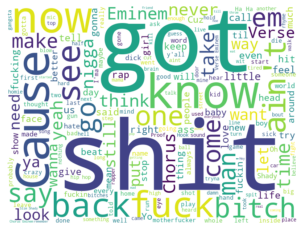

In [80]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
wordcloud.to_file('./wordcloud.png')

### 言葉汚い。笑
### ビヨンセならもっと情熱的な感じになるかしら？

In [69]:
beyonce = "https://www.lyricsfreak.com/b/beyonce/"

result = requests.get(beyonce)
c = result.content
soup = BeautifulSoup(c,"html.parser")

links = soup.find_all("div", class_='lf-list__cell lf-list__title lf-list__cell--full')

lyric_list_b = pd.DataFrame(columns=['lyrics'])
for link in links:
    try:
        detail = link.find('a').get('href')
        detail_url = 'https://www.lyricsfreak.com' + detail
        print(detail_url)
        result_song = requests.get(detail_url)
        c_song = result_song.content
        soup_song = BeautifulSoup(c_song, 'html.parser')
        summary_song = soup_song.find('div', id='content').text
        summary_song = summary_song.replace('<br />','')
        time.sleep(1)
    
        tmp_se = pd.DataFrame([summary_song], index=lyric_list_b.columns).T
        lyric_list_b = lyric_list_b.append(tmp_se)
        
    except:
        pass
        
lyric_list_b.to_csv('lyric_list_b.csv', mode = 'w')

https://www.lyricsfreak.com/b/beyonce/11_20912826.html
https://www.lyricsfreak.com/b/beyonce/6+inch_21108296.html
https://www.lyricsfreak.com/b/beyonce/632+5792_20667979.html
https://www.lyricsfreak.com/b/beyonce/711_21090776.html
https://www.lyricsfreak.com/b/beyonce/a+girl+with+no+name_20911009.html
https://www.lyricsfreak.com/b/beyonce/a+woman+like+me_20529093.html
https://www.lyricsfreak.com/b/beyonce/already_1672383.html
https://www.lyricsfreak.com/b/beyonce/after+all+is+said+and+done+feat+marc+nelson_20202291.html
https://www.lyricsfreak.com/b/beyonce/aint+nothing+like+the+real+thing_20757647.html
https://www.lyricsfreak.com/b/beyonce/all+i+could+do+was+cry_20767341.html
https://www.lyricsfreak.com/b/beyonce/all+night_21108302.html
https://www.lyricsfreak.com/b/beyonce/amor+gitano_20407423.html
https://www.lyricsfreak.com/b/beyonce/angel_20834548.html
https://www.lyricsfreak.com/b/beyonce/at+last_20765603.html
https://www.lyricsfreak.com/b/beyonce/ave+maria_20765575.html
https://

In [75]:
df_file = pd.read_csv('lyric_list_b.csv', encoding='utf-8')
song_lyrics = df_file['lyrics'].tolist()
text_file = 'beyonce_list.txt'
with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(song_lyrics))

In [82]:
text_file = open('beyonce_list.txt', encoding='utf-8')
text = text_file.read()

stopwords = set(STOPWORDS)
wordcloud_b = WordCloud(background_color='white', width=800, height=600, stopwords=stopwords).generate(text)

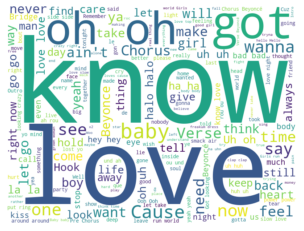

In [83]:
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis('off')
plt.show()

In [87]:
wordcloud_b.to_file('./wordcloud_b.png')

## Oh oh, got know Love
### もうこれだけでビヨンセっぽい。笑